In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import os
import pickle
from os.path import join, expanduser
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

from utils import encode_labels, train_test_split
from quantization import quantize
from decision_tree import learn_tree, predict_tree
from ensemble import RandomForestClassifier

In [6]:
n_clusters = 3
dataset_path = join('datasets', 'adl')
X, labels = quantize(dataset_path, n_clusters)
y, encoder, classes = encode_labels(labels)

Sample 001 | number of observations: 395
Sample 002 | number of observations: 349
Sample 003 | number of observations: 300
Sample 004 | number of observations: 281
Sample 005 | number of observations: 718
Sample 006 | number of observations: 607
Sample 007 | number of observations: 408
Sample 008 | number of observations: 736
Sample 009 | number of observations: 334
Sample 010 | number of observations: 417
Sample 011 | number of observations: 442
Sample 012 | number of observations: 419
Sample 013 | number of observations: 304
Sample 014 | number of observations: 212
Sample 015 | number of observations: 679
Sample 016 | number of observations: 307
Sample 017 | number of observations: 439
Sample 018 | number of observations: 428
Sample 019 | number of observations: 331
Sample 020 | number of observations: 301
Sample 021 | number of observations: 460
Sample 022 | number of observations: 302
Sample 023 | number of observations: 297
Sample 024 | number of observations: 428
Sample 025 | num

Sample 202 | number of observations: 445
Sample 203 | number of observations: 386
Sample 204 | number of observations: 372
Sample 205 | number of observations: 463
Sample 206 | number of observations: 518
Sample 207 | number of observations: 502
Sample 208 | number of observations: 474
Sample 209 | number of observations: 261
Sample 210 | number of observations: 495
Sample 211 | number of observations: 292
Sample 212 | number of observations: 256
Sample 213 | number of observations: 336
Sample 214 | number of observations: 527
Sample 215 | number of observations: 343
Sample 216 | number of observations: 736
Sample 217 | number of observations: 500
Sample 218 | number of observations: 316
Sample 219 | number of observations: 381
Sample 220 | number of observations: 485
Sample 221 | number of observations: 489
Sample 222 | number of observations: 501
Sample 223 | number of observations: 699
Sample 224 | number of observations: 303
Sample 225 | number of observations: 482
Sample 226 | num

Sample 402 | number of observations: 443
Sample 403 | number of observations: 361
Sample 404 | number of observations: 455
Sample 405 | number of observations: 270
Sample 406 | number of observations: 414
Sample 407 | number of observations: 380
Sample 408 | number of observations: 412
Sample 409 | number of observations: 464
Sample 410 | number of observations: 195
Sample 411 | number of observations: 359
Sample 412 | number of observations: 382
Sample 413 | number of observations: 473
Sample 414 | number of observations: 280
Sample 415 | number of observations: 524
Sample 416 | number of observations: 386
Sample 417 | number of observations: 518
Sample 418 | number of observations: 431
Sample 419 | number of observations: 486
Sample 420 | number of observations: 378
Sample 421 | number of observations: 385
Sample 422 | number of observations: 419
Sample 423 | number of observations: 463
Sample 424 | number of observations: 270
Sample 425 | number of observations: 408
Sample 426 | num

Sample 602 | number of observations: 313
Sample 603 | number of observations: 184
Sample 604 | number of observations: 4251
Sample 605 | number of observations: 4338
Sample 606 | number of observations: 9318
Sample 607 | number of observations: 7470
Sample 608 | number of observations: 5859
Sample 609 | number of observations: 939
Sample 610 | number of observations: 812
Sample 611 | number of observations: 833
Sample 612 | number of observations: 643
Sample 613 | number of observations: 806
Sample 614 | number of observations: 742
Sample 615 | number of observations: 636
Sample 616 | number of observations: 719
Sample 617 | number of observations: 734
Sample 618 | number of observations: 818
Sample 619 | number of observations: 813
Sample 620 | number of observations: 811
Sample 621 | number of observations: 737
Sample 622 | number of observations: 587
Sample 623 | number of observations: 637
Sample 624 | number of observations: 584
Sample 625 | number of observations: 753
Sample 626 

Sample 804 | number of observations: 426
Sample 805 | number of observations: 448
Sample 806 | number of observations: 476
Sample 807 | number of observations: 372
Sample 808 | number of observations: 510
Sample 809 | number of observations: 378
Sample 810 | number of observations: 363
Sample 811 | number of observations: 394
Sample 812 | number of observations: 491
Sample 813 | number of observations: 459
Sample 814 | number of observations: 347
Sample 815 | number of observations: 380
Sample 816 | number of observations: 369
Sample 817 | number of observations: 435
Sample 818 | number of observations: 432
Sample 819 | number of observations: 406
Sample 820 | number of observations: 390
Sample 821 | number of observations: 428
Sample 822 | number of observations: 463
Sample 823 | number of observations: 355
Sample 824 | number of observations: 483
Sample 825 | number of observations: 379
Sample 826 | number of observations: 446
Sample 827 | number of observations: 398
Sample 828 | num

In [10]:
with open('dataset.pickle', 'wb') as fp:
    pickle.dump((X, y, encoder, classes), fp)

In [5]:
with open('dataset.pickle', 'rb') as fp:
    X, y, encoder, classes = pickle.load(fp)

In [6]:
np.random.seed(1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [24]:
random_forest = RandomForestClassifier(
    tree_funcs=(learn_tree, predict_tree),
    n_trees=1000, max_depth=7, min_leaf_size=2,
    min_split_size=5, feature_subset_size='sqrt')

In [25]:
random_forest.fit(X_train, y_train)

In [26]:
with open('forest.pickle', 'wb') as fp:
    pickle.dump(random_forest, fp)

In [8]:
with open('forest.pickle', 'rb') as fp:
    random_forest = pickle.load(fp)

In [9]:
predictions = random_forest.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f'Test set accuracy: {accuracy:2.2%}')

Test set accuracy: 46.88%


> **Note:** A better approach to return decision matrix and compute majority votes for various number of columns. It should be faster then re-running predictions again and again.

In [10]:
decisions_matrix = random_forest.predict_decisions(X_test)

In [11]:
decisions_matrix

array([[ 7, 10,  7, ...,  9, 10, 13],
       [ 9, 10,  7, ...,  1,  1, 11],
       [ 2,  7,  7, ...,  1,  4, 13],
       ..., 
       [ 9,  7,  7, ...,  8, 11, 13],
       [ 9,  9,  7, ...,  9,  7,  9],
       [ 9,  3,  7, ...,  9,  9,  7]])

In [12]:
decisions_matrix.shape

(256, 1000)

In [13]:
accuracy_scores, ensemble_sizes = [], []

for n_trees in range(1, random_forest.n_trees + 1):
    subset = decisions_matrix[:, :n_trees]
    predictions = np.array([np.bincount(row).argmax() for row in subset])
    accuracy = np.mean(predictions == y_test)
    accuracy_scores.append(accuracy)
    ensemble_sizes.append(n_trees)

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [15]:
x = np.log(ensemble_sizes)
y = accuracy_scores
smoothing = make_pipeline(PolynomialFeatures(3), Ridge())
y_plot = smoothing.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))

In [16]:
font_path = join(os.getcwd(), 'fonts', 'RobotoSlab-Light.ttf')
ticks_font = font_manager.FontProperties(fname=font_path)
ticks_font.set_size(20)

In [17]:
label_font = ticks_font.copy()
label_font.set_size(22)

In [18]:
annot_font = ticks_font.copy()
annot_font.set_weight('light')
annot_font.set_size(20)

In [19]:
x_min = x[0]
x_max = x[y_plot.argmax()]
y_min = y_plot.min()
y_max = y_plot.max()

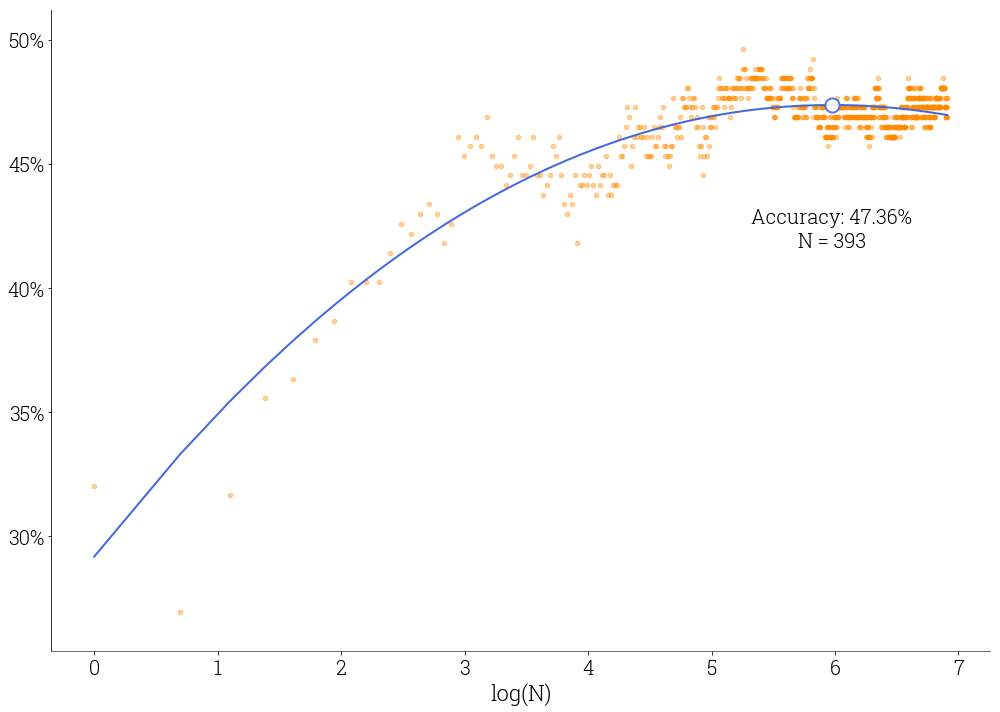

In [22]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
gray_color = '#4A4A4A'
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_color(gray_color)
ax.spines['bottom'].set_color(gray_color)

ax.scatter(x, y, s=20, color='darkorange', alpha=0.4)
ax.plot(x, y_plot, color='royalblue', lw=2)
ax.set_xlabel('log(N)', fontproperties=label_font)

new_x_ticks = [int(x) for x in ax.get_xticks()]
ax.set_xticklabels(new_x_ticks, fontproperties=ticks_font)

new_y_ticks = [f'{y:2.0%}' for y in ax.get_yticks()]
ax.set_yticklabels(new_y_ticks, fontproperties=ticks_font);

#ax.hlines(y_max, x_min, x_max)
#ax.vlines(x_max, y_min, y_max)

ax.scatter(x_max, y_max, s=200, color='white', edgecolor='royalblue', lw=2, alpha=0.9, marker='o', zorder=3)
ax.annotate(s=f'Accuracy: {y_max:2.2%}\nN = {ensemble_sizes[y_plot.argmax()]}', 
            va='center', 
            ha='center',
            xy=(x_max, y_max - 0.05), 
            fontproperties=annot_font)

fig.tight_layout()

# ax.plot(ensemble_sizes, accuracy_scores, color='royalblue')
# ax.scatter(np.log(ensemble_sizes), accuracy_scores, s=20, color='darkorange', alpha=0.4)
# ax.plot(ensemble_sizes[window_size - 1:], smoothed_line, color='royalblue')

In [23]:
fig.savefig(expanduser('~/Desktop/log_acc.png'), transparent=True)